In [53]:
!pip install matplotlib

  Using cached matplotlib-3.6.2-cp39-cp39-win_amd64.whl (7.2 MB)
  Using cached kiwisolver-1.4.4-cp39-cp39-win_amd64.whl (55 kB)
  Using cached contourpy-1.0.6-cp39-cp39-win_amd64.whl (161 kB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)


In [2]:
import face_recognition
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [11]:
import os 
images_dir = os.path.join(".", "data")
known_face_encodings = [
    
]
known_face_names = [
    
]

for i in os.listdir(images_dir):
    path = images_dir + "\\" + i
   
    obama_image = face_recognition.load_image_file(path)
    obama_face_encoding = face_recognition.face_encodings(obama_image)[0]
    known_face_encodings.append(obama_face_encoding)
    known_face_names.append(i.split(".")[0])

print(known_face_names)

['Jennifer Lopez', 'Obama', 'Tom C', 'Trump']


.\test\face1.jpg
['Trump']


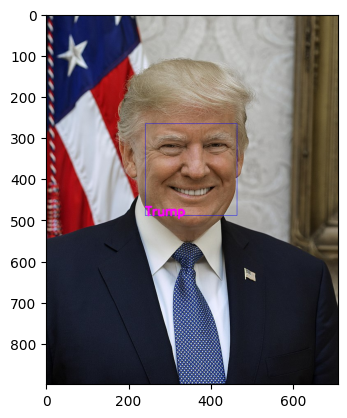

.\test\face2.jpeg
['Tom C']


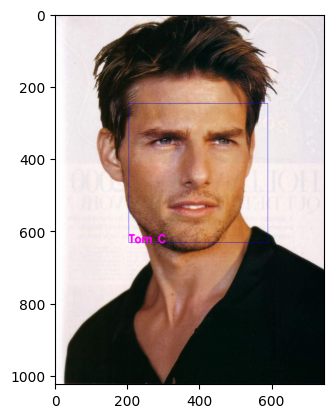

.\test\face5.jpg
['Obama']


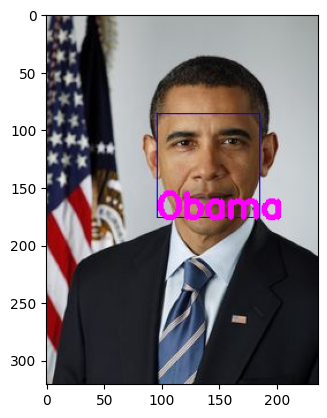

.\test\test1.jpg
['Jennifer Lopez']


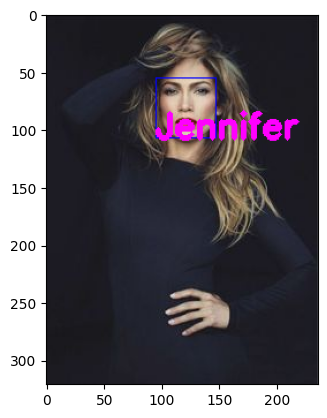

.\test\test10.jpg
['Jennifer Lopez']


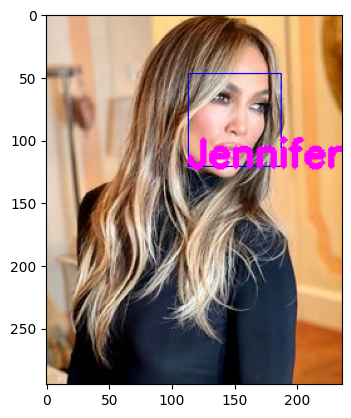

.\test\test2.jpg
['Obama']


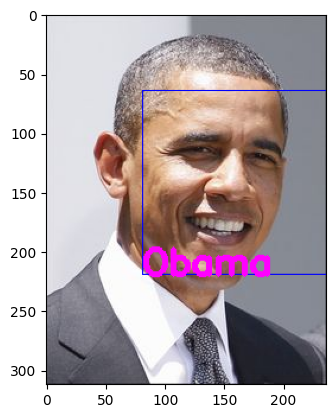

.\test\test3.JPG
['Unknown']


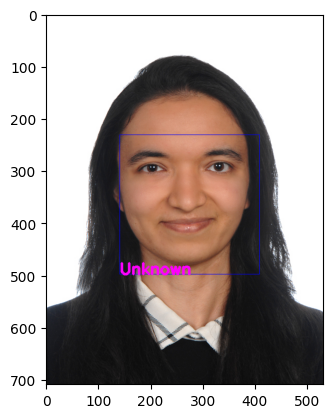

.\test\test5.jpg
['Trump']


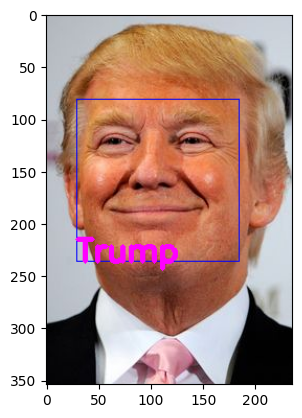

.\test\test6.jpg
['Jennifer Lopez']


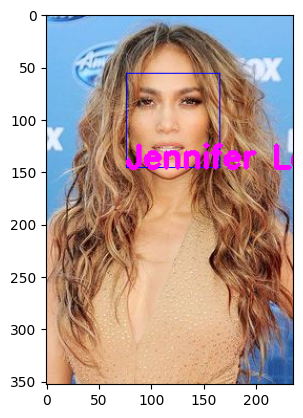

.\test\test7.jpg
['Trump']


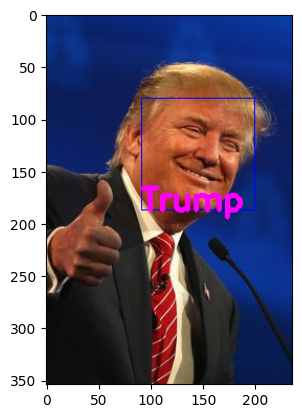

.\test\test8.jpg
['Jennifer Lopez', 'Jennifer Lopez', 'Jennifer Lopez']


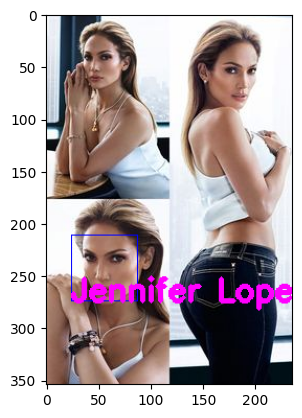

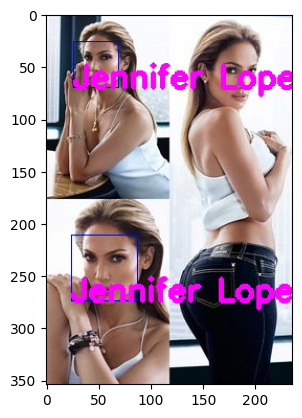

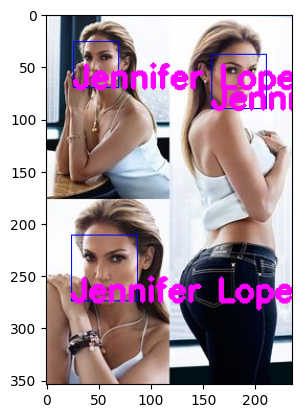

.\test\test9.jpg
['Jennifer Lopez']


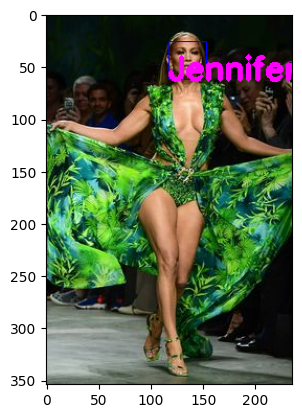

.\test\tst4.jpg
['Unknown']


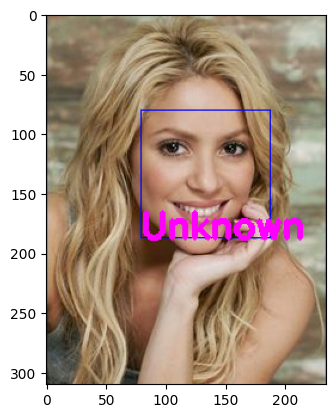

In [17]:
face_locations = []
face_encodings = []

test_image_filename = './test/test3.JPG'
imagesdir = os.path.join(".", "test")
for i in os.listdir(imagesdir):
    path = imagesdir + "\\" + i
    print(path)
    imgTest = face_recognition.load_image_file(path)
    face_names = []
    face_locations = face_recognition.face_locations(imgTest)
    face_encodings = face_recognition.face_encodings(imgTest, face_locations)
    for face_encoding in face_encodings:
        matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
        name = "Unknown"
        face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
        best_match_index = np.argmin(face_distances)
        if matches[best_match_index]:
            name = known_face_names[best_match_index]
        face_names.append(name)
    print(face_names)
    for (top, right, bottom, left), name in zip(face_locations, face_names):
        face_detect = cv2.rectangle(imgTest, (left, top), (right, bottom), (0, 0, 255), 1)
        plt.imshow(face_detect)
    
    
   
        font = cv2.FONT_HERSHEY_SIMPLEX        
        n = cv2.putText(imgTest, name,(left, bottom),font, 1.0, (255, 0, 255), 3)
        plt.imshow(n)
        plt.show()
        
    


In [ ]:
import face_recognition
import cv2
import numpy as np

video_capture = cv2.VideoCapture(0)
face_locations = []
face_encodings = []
face_names = []
process_this_frame = True

while True:
    ret, frame = video_capture.read()

    if process_this_frame:
        
        small_frame = cv2.resize(frame, (0, 0), fx=0.25, fy=0.25)
        rgb_small_frame = small_frame[:, :, ::-1]
    
        face_locations = face_recognition.face_locations(rgb_small_frame)
        face_encodings = face_recognition.face_encodings(rgb_small_frame, face_locations)

        face_names = []
        for face_encoding in face_encodings:

            matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
            name = "Unknown"
            face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
            best_match_index = np.argmin(face_distances)
            if matches[best_match_index]:
                name = known_face_names[best_match_index]

            face_names.append(name)

    process_this_frame = not process_this_frame

    for (top, right, bottom, left), name in zip(face_locations, face_names):

        top *= 4
        right *= 4
        bottom *= 4
        left *= 4

        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)

        cv2.rectangle(frame, (left, bottom - 35), (right, bottom), (0, 0, 255), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)

    cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video_capture.release()
cv2.destroyAllWindows()